# Interactions - Lab

## Introduction

In this lab, you'll explore interactions in the Ames Housing dataset.

## Objectives

You will be able to:
- Implement interaction terms in Python using the `sklearn` and `statsmodels` packages 
- Interpret interaction variables in the context of a real-world problem 

## Build a baseline model 

You'll use a couple of built-in functions, which we imported for you below: 

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

If you still want to build a model in the end, you can do that, but this lab will just focus on finding meaningful insights in interactions and how they can improve $R^2$ values.

In [29]:
regression = LinearRegression()

Create a baseline model which includes all the variables we selected from the Ames housing data set to predict the house prices. Then use 10-fold cross-validation and report the mean $R^2$ value as the baseline $R^2$.

In [30]:
ames = pd.read_csv('ames.csv')

continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']

In [31]:
# continuous variables
ames_cont = ames[continuous]
ames_log = np.log(ames_cont)
log_names = [f'{feature}_log' for feature in continuous]
ames_log.columns = log_names
ames_log.head()

,LotArea_log,1stFlrSF_log,GrLivArea_log,SalePrice_log
0,9.041922,6.752270,7.444249,12.247694
1,9.169518,7.140453,7.140453,12.109011
2,9.328123,6.824374,7.487734,12.317167
3,9.164296,6.867974,7.448334,11.849398
4,9.565214,7.043160,7.695303,12.429216


In [32]:
# helper function to normalize
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

In [33]:
# normalize ames_log
ames_log_norm = ames_log.apply(normalize)

In [34]:
# one hot encode categoricals
ames_ohe = pd.get_dummies(ames[categoricals], prefix=categoricals, drop_first=True)

In [35]:
# concat continuous with categorical
# preprocessed = pd.concat([ames_log_norm, ames_ohe], axis=1)
# X = preprocessed.drop(columns=['SalePrice_log'])
# y = preprocessed['SalePrice_log']

# -----uncomment above to run with log normalized continuous variables----
# I changed the below to match solution to ensure rest of lab was correct


# the solution does not append log normalized (this is an error)
preprocessed = pd.concat([ames_cont, ames_ohe], axis=1)
X = preprocessed.drop(columns=['SalePrice'])
y = preprocessed['SalePrice']


In [36]:
#get baseline model
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, cv=crossvalidation))
baseline

0.7773817128042101

## See how interactions improve your baseline

Next, create all possible combinations of interactions, loop over them and add them to the baseline model one by one to see how they affect the $R^2$. We'll look at the 3 interactions which have the biggest effect on our $R^2$, so print out the top 3 combinations.

You will create a `for` loop to loop through all the combinations of 2 predictors. You can use `combinations` from itertools to create a list of all the pairwise combinations. To find more info on how this is done, have a look [here](https://docs.python.org/2/library/itertools.html).

Since there are so many different neighbourhoods we will exclude

In [37]:
from itertools import combinations

In [38]:
features = X.columns
features

Index(['LotArea', '1stFlrSF', 'GrLivArea', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'SaleType_CWD',
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighbor

In [39]:
combos = combinations(features, 2)
all_interactions = [combo for combo in combos]

In [40]:
# store interaction results in dictionary
interactions = {}

for i, interaction in enumerate(all_interactions):
    X_interact = X.copy()
    X_interact[interaction] = X[interaction[0]] * X[interaction[1]]
    r_squared = np.mean(cross_val_score(regression, X_interact, y, scoring='r2', cv=crossvalidation))
    
    if (r_squared > baseline):
        interactions[interaction] = r_squared
        print(interaction, r_squared)

('LotArea', 'BldgType_2fmCon') 0.778589913335075
('LotArea', 'SaleType_Con') 0.7779506251409576
('LotArea', 'SaleType_ConLI') 0.7774876855027641
('LotArea', 'SaleType_New') 0.7931273923137889
('LotArea', 'SaleType_Oth') 0.7780175799522856
('LotArea', 'SaleType_WD') 0.7906354461190374
('LotArea', 'Street_Pave') 0.7780427534958254
('LotArea', 'Neighborhood_BrkSide') 0.7784720543771675
('LotArea', 'Neighborhood_Edwards') 0.8093314939295133
('LotArea', 'Neighborhood_Mitchel') 0.7783501384312512
('LotArea', 'Neighborhood_NoRidge') 0.778376735698773
('LotArea', 'Neighborhood_NridgHt') 0.7837853111904158
('LotArea', 'Neighborhood_OldTown') 0.778059635794865
('LotArea', 'Neighborhood_Sawyer') 0.7774192053514778
('LotArea', 'Neighborhood_SawyerW') 0.7780438658294352
('1stFlrSF', 'BldgType_2fmCon') 0.7777232679880279
('1stFlrSF', 'BldgType_Duplex') 0.778838938583214
('1stFlrSF', 'KitchenQual_Gd') 0.7822396599316044
('1stFlrSF', 'SaleType_Con') 0.7786512786632713
('1stFlrSF', 'MSZoning_FV') 0.777

('BldgType_TwnhsE', 'SaleType_WD') 0.7787074225880075
('BldgType_TwnhsE', 'MSZoning_FV') 0.7774783415504497
('BldgType_TwnhsE', 'MSZoning_RH') 0.7783157402388724
('BldgType_TwnhsE', 'MSZoning_RL') 0.7797751983025766
('BldgType_TwnhsE', 'MSZoning_RM') 0.777933836684616
('BldgType_TwnhsE', 'Street_Pave') 0.7773817128043155
('BldgType_TwnhsE', 'Neighborhood_Blueste') 0.777410318031088
('BldgType_TwnhsE', 'Neighborhood_BrDale') 0.7774112675533971
('BldgType_TwnhsE', 'Neighborhood_BrkSide') 0.7773817128042102
('BldgType_TwnhsE', 'Neighborhood_ClearCr') 0.7773817128042102
('BldgType_TwnhsE', 'Neighborhood_Crawfor') 0.7802922446899256
('BldgType_TwnhsE', 'Neighborhood_Edwards') 0.7776822137983636
('BldgType_TwnhsE', 'Neighborhood_Gilbert') 0.7773817128042102
('BldgType_TwnhsE', 'Neighborhood_IDOTRR') 0.7773817128042102
('BldgType_TwnhsE', 'Neighborhood_Mitchel') 0.777483954381685
('BldgType_TwnhsE', 'Neighborhood_NAmes') 0.7783157402388724
('BldgType_TwnhsE', 'Neighborhood_NPkVill') 0.7773880

('SaleType_Con', 'Neighborhood_SawyerW') 0.7773817128042102
('SaleType_Con', 'Neighborhood_StoneBr') 0.7773817128042102
('SaleType_Con', 'Neighborhood_Timber') 0.7773817128042102
('SaleType_Con', 'Neighborhood_Veenker') 0.7782773990739428
('SaleType_ConLD', 'SaleType_ConLI') 0.7773817128042102
('SaleType_ConLD', 'SaleType_ConLw') 0.7773817128042102
('SaleType_ConLD', 'SaleType_New') 0.7773817128042102
('SaleType_ConLD', 'SaleType_Oth') 0.7773817128042102
('SaleType_ConLD', 'SaleType_WD') 0.7773817128042102
('SaleType_ConLD', 'MSZoning_FV') 0.7773817128042102
('SaleType_ConLD', 'MSZoning_RH') 0.7773817128042102
('SaleType_ConLD', 'Neighborhood_Blueste') 0.7773817128042102
('SaleType_ConLD', 'Neighborhood_BrDale') 0.7773817128042102
('SaleType_ConLD', 'Neighborhood_BrkSide') 0.7773817128042102
('SaleType_ConLD', 'Neighborhood_ClearCr') 0.7773817128042102
('SaleType_ConLD', 'Neighborhood_Crawfor') 0.7773817128042102
('SaleType_ConLD', 'Neighborhood_Edwards') 0.7774191610695887
('SaleType_

('SaleType_WD', 'Neighborhood_SWISU') 0.7773817128043146
('SaleType_WD', 'Neighborhood_StoneBr') 0.7794615136331517
('SaleType_WD', 'Neighborhood_Veenker') 0.7778534178935173
('MSZoning_FV', 'MSZoning_RH') 0.7773817128042102
('MSZoning_FV', 'MSZoning_RL') 0.7773817128042102
('MSZoning_FV', 'MSZoning_RM') 0.7773817128042102
('MSZoning_FV', 'Street_Pave') 0.777381712804328
('MSZoning_FV', 'Neighborhood_Blueste') 0.7773817128042102
('MSZoning_FV', 'Neighborhood_BrDale') 0.7773817128042102
('MSZoning_FV', 'Neighborhood_BrkSide') 0.7773817128042102
('MSZoning_FV', 'Neighborhood_ClearCr') 0.7773817128042102
('MSZoning_FV', 'Neighborhood_CollgCr') 0.7773817128042102
('MSZoning_FV', 'Neighborhood_Crawfor') 0.7773817128042102
('MSZoning_FV', 'Neighborhood_Edwards') 0.7773817128042102
('MSZoning_FV', 'Neighborhood_Gilbert') 0.7773817128042102
('MSZoning_FV', 'Neighborhood_IDOTRR') 0.7773817128042102
('MSZoning_FV', 'Neighborhood_MeadowV') 0.7773817128042102
('MSZoning_FV', 'Neighborhood_Mitchel'

('Neighborhood_BrDale', 'Neighborhood_Edwards') 0.7773817128042102
('Neighborhood_BrDale', 'Neighborhood_Gilbert') 0.7773817128042102
('Neighborhood_BrDale', 'Neighborhood_IDOTRR') 0.7773817128042102
('Neighborhood_BrDale', 'Neighborhood_MeadowV') 0.7773817128042102
('Neighborhood_BrDale', 'Neighborhood_Mitchel') 0.7773817128042102
('Neighborhood_BrDale', 'Neighborhood_NAmes') 0.7773817128042102
('Neighborhood_BrDale', 'Neighborhood_NPkVill') 0.7773817128042102
('Neighborhood_BrDale', 'Neighborhood_NWAmes') 0.7773817128042102
('Neighborhood_BrDale', 'Neighborhood_NoRidge') 0.7773817128042102
('Neighborhood_BrDale', 'Neighborhood_NridgHt') 0.7773817128042102
('Neighborhood_BrDale', 'Neighborhood_OldTown') 0.7773817128042102
('Neighborhood_BrDale', 'Neighborhood_SWISU') 0.7773817128042102
('Neighborhood_BrDale', 'Neighborhood_Sawyer') 0.7773817128042102
('Neighborhood_BrDale', 'Neighborhood_SawyerW') 0.7773817128042102
('Neighborhood_BrDale', 'Neighborhood_Somerst') 0.7773817128042102
('

('Neighborhood_Gilbert', 'Neighborhood_Somerst') 0.7773817128042102
('Neighborhood_Gilbert', 'Neighborhood_StoneBr') 0.7773817128042102
('Neighborhood_Gilbert', 'Neighborhood_Timber') 0.7773817128042102
('Neighborhood_Gilbert', 'Neighborhood_Veenker') 0.7773817128042102
('Neighborhood_IDOTRR', 'Neighborhood_MeadowV') 0.7773817128042102
('Neighborhood_IDOTRR', 'Neighborhood_Mitchel') 0.7773817128042102
('Neighborhood_IDOTRR', 'Neighborhood_NAmes') 0.7773817128042102
('Neighborhood_IDOTRR', 'Neighborhood_NPkVill') 0.7773817128042102
('Neighborhood_IDOTRR', 'Neighborhood_NWAmes') 0.7773817128042102
('Neighborhood_IDOTRR', 'Neighborhood_NoRidge') 0.7773817128042102
('Neighborhood_IDOTRR', 'Neighborhood_NridgHt') 0.7773817128042102
('Neighborhood_IDOTRR', 'Neighborhood_OldTown') 0.7773817128042102
('Neighborhood_IDOTRR', 'Neighborhood_SWISU') 0.7773817128042102
('Neighborhood_IDOTRR', 'Neighborhood_Sawyer') 0.7773817128042102
('Neighborhood_IDOTRR', 'Neighborhood_SawyerW') 0.777381712804210

In [41]:
sorted_dict = {k: v for k, v in sorted(interactions.items(), key=lambda item: item[1], reverse=True)}

In [42]:
sorted_dict

{('LotArea', 'Neighborhood_Edwards'): 0.8093314939295133,
 ('GrLivArea', 'Neighborhood_Edwards'): 0.8077114235219648,
 ('1stFlrSF', 'Neighborhood_Edwards'): 0.8033414554231054,
 ('LotArea', 'SaleType_New'): 0.7931273923137889,
 ('GrLivArea', 'Neighborhood_NoRidge'): 0.7930790499039408,
 ('LotArea', 'SaleType_WD'): 0.7906354461190374,
 ('1stFlrSF', 'Neighborhood_NridgHt'): 0.7845792550853155,
 ('LotArea', 'Neighborhood_NridgHt'): 0.7837853111904158,
 ('GrLivArea', 'Neighborhood_NridgHt'): 0.7830123744526247,
 ('SaleType_New', 'Neighborhood_Edwards'): 0.7829627554318175,
 ('1stFlrSF', 'Neighborhood_NoRidge'): 0.7826567131582727,
 ('BldgType_TwnhsE', 'Neighborhood_StoneBr'): 0.782246164763044,
 ('1stFlrSF', 'KitchenQual_Gd'): 0.7822396599316044,
 ('GrLivArea', 'KitchenQual_Gd'): 0.7819495257069627,
 ('1stFlrSF', 'Neighborhood_Veenker'): 0.7811744839803141,
 ('1stFlrSF', 'Neighborhood_StoneBr'): 0.780679111514352,
 ('SaleType_New', 'Neighborhood_StoneBr'): 0.780611140596343,
 ('BldgType_Tw

It looks like the top interactions involve the Neighborhood_Edwards feature so lets add the interaction between LotArea and Edwards to our model.

We can interpret this feature as the relationship between LotArea and SalePrice when the house is in Edwards or not.

## Visualize the Interaction

Separate all houses that are located in Edwards and those that are not. Run a linear regression on each population against `SalePrice`. Visualize the regression line and data points with price on the y axis and LotArea on the x axis.

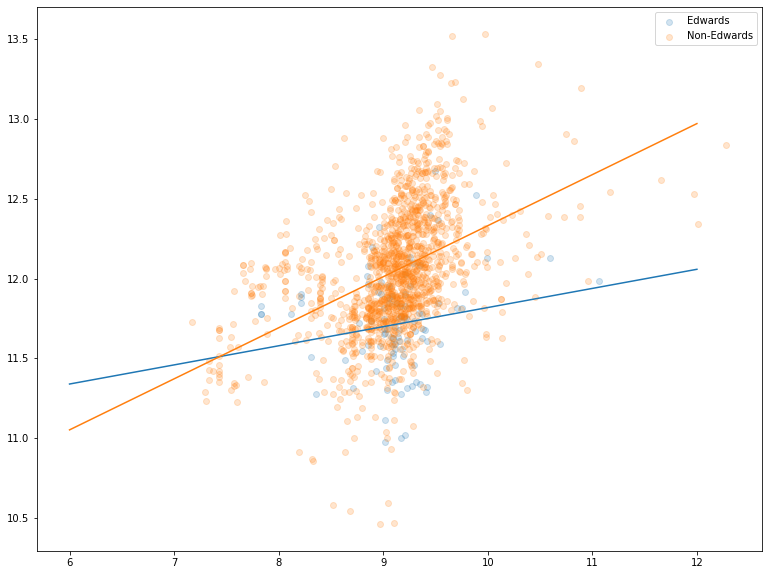

In [90]:
fig, ax = plt.subplots(figsize=(13, 10))
col = 'LotArea'
edwards = preprocessed.loc[preprocessed['Neighborhood_Edwards'] == 1, [col, 'SalePrice']]
non_edwards = preprocessed.loc[preprocessed['Neighborhood_Edwards'] != 1, [col, 'SalePrice']]

linreg = LinearRegression()
linreg.fit(np.log(edwards[['LotArea']]), np.log(edwards['SalePrice']))
y_hat = linreg.predict(np.log(edwards[['LotArea']]))
ax.scatter(np.log(edwards['LotArea']), np.log(edwards['SalePrice']), alpha=0.2, label='Edwards')
x = np.linspace(6, 12)
ax.plot(x, linreg.predict(x.reshape(-1, 1)))
plt.legend()

linreg = LinearRegression()
linreg.fit(np.log(non_edwards[['LotArea']]), np.log(non_edwards['SalePrice']))
y_hat = linreg.predict(np.log(non_edwards[['LotArea']]))
ax.scatter(np.log(non_edwards[['LotArea']]), np.log(non_edwards['SalePrice']), alpha=0.2, label='Non-Edwards')
x = np.linspace(6, 12)
ax.plot(x, linreg.predict(x.reshape(-1, 1)))

plt.legend()

plt.show()

## Build a final model with interactions

Use 10-fold cross-validation to build a model using the above interaction. 

In [92]:
# code here
linreg = LinearRegression()
cross_val = KFold(n_splits=10, shuffle=True, random_state=1)
X = preprocessed.drop(columns=['SalePrice'])
y = preprocessed['SalePrice']
X_interact = X.copy()
X_interact['edwards_lotarea'] = X['Neighborhood_Edwards'] * X['LotArea']
interact = np.mean(cross_val_score(linreg, X_interact, y, scoring='r2', cv=cross_val))
interact

0.8093314939295133

Our $R^2$ has increased considerably! Let's have a look in `statsmodels` to see if this interactions are significant.

In [94]:
# code here
import statsmodels.api as sm
predictors_int = sm.add_constant(X_interact)
model = sm.OLS(y, predictors_int)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     148.6
Date:                Thu, 10 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:34:15   Log-Likelihood:                -17229.
No. Observations:                1460   AIC:                         3.456e+04
Df Residuals:                    1411   BIC:                         3.482e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 8.786e+04   2.21e+04      3.981      0.000    4.46e+04    1.31e+05
LotArea                  0.6108      0.103      5.916      0.000       0.408       0.813
1stFlrSF                35.0664      3.288     10.664      0.000      28.616      41.517
GrLivArea               58.1426      2.405     24.171      0.000      53.424      62.861
BldgType_2fmCon       -1.68e+04   6356.288     -2.644      0.008   -2.93e+04   -4335.365
BldgType_Duplex      -3.286e+04   4942.627     -6.649      0.000   -4.26e+04   -2.32e+04
BldgType_Twnhs       -3.628e+04   6923.682     -5.240      0.000   -4.99e+04   -2.27e+04
BldgType_TwnhsE      -2.334e+04   4546.417     -5.134      0.000   -3.23e+04   -1.44e+04
KitchenQual_Fa       -8.074e+04   7132.327    -11.320      0.000   -9.47e+04   -6.67e+04
KitchenQual_Gd        -5.41e+04   4088.126    -13.233      0.000   -6.21e+04   -4.61e+04
KitchenQual_TA       -6.998e+04   4519.771    -15.482      0.000   -7.88e+04   -6.11e+04
SaleType_CWD          2.125e+04   1.73e+04      1.227      0.220   -1.27e+04    5.52e+04
SaleType_Con          6.292e+04   2.45e+04      2.572      0.010    1.49e+04    1.11e+05
SaleType_ConLD        1.643e+04   1.25e+04      1.314      0.189   -8097.652    4.09e+04
SaleType_ConLI        1.705e+04   1.57e+04      1.084      0.278   -1.38e+04    4.79e+04
SaleType_ConLw        1.092e+04   1.57e+04      0.694      0.488      -2e+04    4.18e+04
SaleType_New          3.227e+04   6355.612      5.078      0.000    1.98e+04    4.47e+04
SaleType_Oth          8711.8997   1.98e+04      0.441      0.659      -3e+04    4.75e+04
SaleType_WD           1.269e+04   5263.624      2.410      0.016    2361.401     2.3e+04
MSZoning_FV           3.798e+04   1.55e+04      2.444      0.015    7495.119    6.85e+04
MSZoning_RH           1.805e+04   1.56e+04      1.154      0.249   -1.26e+04    4.87e+04
MSZoning_RL           2.925e+04    1.3e+04      2.241      0.025    3651.729    5.48e+04
MSZoning_RM           3.397e+04   1.22e+04      2.781      0.005       1e+04    5.79e+04
Street_Pave          -3247.9560   1.46e+04     -0.222      0.824    -3.2e+04    2.55e+04
Neighborhood_Blueste  8014.5330   2.55e+04      0.314      0.754   -4.21e+04    5.81e+04
Neighborhood_BrDale   -1.12e+04   1.36e+04     -0.821      0.412    -3.8e+04    1.56e+04
Neighborhood_BrkSide -4.136e+04   1.09e+04     -3.778      0.000   -6.28e+04   -1.99e+04
Neighborhood_ClearCr -2.357e+04   1.13e+04     -2.084      0.037   -4.57e+04   -1381.560
Neighborhood_CollgCr -7958.2863   9382.255     -0.848      0.396   -2.64e+04    1.04e+04
Neighborhood_Crawfor -8097.9531   1.02e+04     -0.794      0.427   -2.81e+04    1.19e+04
Neighborhood_Edwards  2.208e+04   1.13e+04      1.957      0.051     -50.592    4.42e+04
Neighborhood_Gilbert -1.169e+04   9919.897     -1.179    

What is your conclusion here?

In [95]:
# formulate your conclusion
# With a p-value of 0.000, this coefficient is significant at the 0.05 level.  We are 95% confident the actual 
# coefficient is between -8.161 and -6.150

## Summary

You should now understand how to include interaction effects in your model! As you can see, interactions can have a strong impact on linear regression models, and they should always be considered when you are constructing your models.